In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
import seaborn as sns
import spacy
# nlp = spacy.load('en_core_web_sm')
import en_core_web_sm
nlp = en_core_web_sm.load()
from collections import Counter
import json

workDir = '~/Documents/UMSI/630-NLP/FinalProject/'
trainfile = 'tsd_train.csv'
testfile = 'tsd_test.csv'

import re
from transformers import BertTokenizer
from transformers import AutoModel, AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("roberta-base")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


In [2]:
# import torch
# from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
# model = BertModel.from_pretrained('bert-base-uncased')
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model.eval()

In [6]:
def read_data(file_name):
    '''
    read data and analyze different types of tokens. (bert is better since it consider word and character level)
    '''
    data = pd.read_csv(file_name)
    sent_list = data['text']
    sent_label = data['spans']
    sent_list = [x.lower() for x in sent_list]
    print(len(sent_list))
    sns.histplot([len(x) for x in sent_list], bins=[64 * i for i in range(20)])
    plt.show()
    print(sent_list[1])
    
    tokenizer_origin = RegexpTokenizer(r'[^\s]+')
    tokens_list = [tokenizer_origin.tokenize(x) for x in sent_list]
    sns.histplot([len(x) for x in tokens_list], bins=[12 * i for i in range(20)])
    plt.show()
    print(tokens_list[1])
    
    tokens_list = [tokenizer.tokenize(x) for x in sent_list]
    sns.histplot([len(x) for x in tokens_list], bins=[12 * i for i in range(20)])
    plt.show()
    print(tokens_list[1])
    
    return sent_list, sent_label, tokens_list

In [4]:
# adf... fad!
# adf . . . fad !
# (0,3), (3,4), (4,5), (5,6), (7,10), (10,11)
from tqdm import tqdm
def bert_token_labeling(sent_ls):
    '''
    get the bert tokens and the encoded ids
    '''
    tokens_idx = []
    tokens_en = []
    for sent in sent_ls:   
        token_idx = []
        token_en = []
        for m in re.finditer(r'\S+', sent):
            raw = m.group(0)
            encodes = tokenizer.encode(raw, add_special_tokens=False)
            tokens = tokenizer.tokenize(raw)
            head = m.start()
            for num, token in enumerate(tokens):
                tail = head + len(token)
                token_idx.append((token, (head, tail)))
                token_en.append(encodes[num])
                head = tail
        tokens_idx.append(token_idx)
        tokens_en.append(token_en)
    return tokens_idx, tokens_en

7939


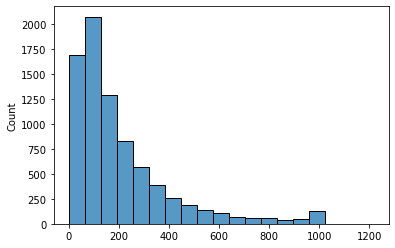

i am 56 years old, i am not your fucking junior pal. what you are saying makes no sense. i don't know what you are basing this on. the cheap black market crap is still coming up from mexican nationals, and the good stuff from bc and humbolt.  the i5 corridor is still just as busy, and they are still making a ton of money. nothing has really changed except that the legal market has made it easy for anyone of legal age to buy it.  and the legal market is controlled by corporate growers with million dollar facilities, or a co-op of smaller growers. the federal government "war on drugs" really has no impact on the legal market in oregon. i don't see any glutton of weed, whatever that means.


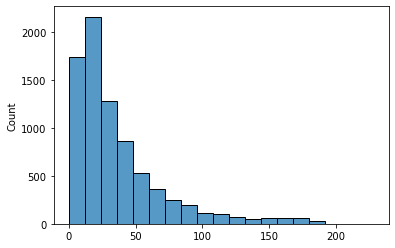

['i', 'am', '56', 'years', 'old,', 'i', 'am', 'not', 'your', 'fucking', 'junior', 'pal.', 'what', 'you', 'are', 'saying', 'makes', 'no', 'sense.', 'i', "don't", 'know', 'what', 'you', 'are', 'basing', 'this', 'on.', 'the', 'cheap', 'black', 'market', 'crap', 'is', 'still', 'coming', 'up', 'from', 'mexican', 'nationals,', 'and', 'the', 'good', 'stuff', 'from', 'bc', 'and', 'humbolt.', 'the', 'i5', 'corridor', 'is', 'still', 'just', 'as', 'busy,', 'and', 'they', 'are', 'still', 'making', 'a', 'ton', 'of', 'money.', 'nothing', 'has', 'really', 'changed', 'except', 'that', 'the', 'legal', 'market', 'has', 'made', 'it', 'easy', 'for', 'anyone', 'of', 'legal', 'age', 'to', 'buy', 'it.', 'and', 'the', 'legal', 'market', 'is', 'controlled', 'by', 'corporate', 'growers', 'with', 'million', 'dollar', 'facilities,', 'or', 'a', 'co-op', 'of', 'smaller', 'growers.', 'the', 'federal', 'government', '"war', 'on', 'drugs"', 'really', 'has', 'no', 'impact', 'on', 'the', 'legal', 'market', 'in', 'oregon

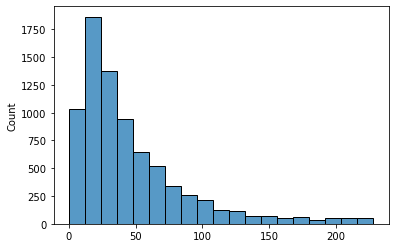

['i', 'am', '56', 'years', 'old', ',', 'i', 'am', 'not', 'your', 'fucking', 'junior', 'pal', '.', 'what', 'you', 'are', 'saying', 'makes', 'no', 'sense', '.', 'i', 'don', "'", 't', 'know', 'what', 'you', 'are', 'basin', '##g', 'this', 'on', '.', 'the', 'cheap', 'black', 'market', 'crap', 'is', 'still', 'coming', 'up', 'from', 'mexican', 'nationals', ',', 'and', 'the', 'good', 'stuff', 'from', 'bc', 'and', 'hum', '##bolt', '.', 'the', 'i', '##5', 'corridor', 'is', 'still', 'just', 'as', 'busy', ',', 'and', 'they', 'are', 'still', 'making', 'a', 'ton', 'of', 'money', '.', 'nothing', 'has', 'really', 'changed', 'except', 'that', 'the', 'legal', 'market', 'has', 'made', 'it', 'easy', 'for', 'anyone', 'of', 'legal', 'age', 'to', 'buy', 'it', '.', 'and', 'the', 'legal', 'market', 'is', 'controlled', 'by', 'corporate', 'grow', '##ers', 'with', 'million', 'dollar', 'facilities', ',', 'or', 'a', 'co', '-', 'op', 'of', 'smaller', 'grow', '##ers', '.', 'the', 'federal', 'government', '"', 'war', 

In [5]:
sent_list, sent_label, tokens_list = read_data(workDir + trainfile)

In [6]:
tokens_index, tokens_en = bert_token_labeling(sent_list)
len(tokens_list), len(tokens_index), len(tokens_en)

(7939, 7939, 7939)

In [7]:
import json
def labeling(tokens_idx, sent_lbl):
    '''
    label the bert tokens according to the ground truth labels
    '''
    result = []
    for i in range(len(tokens_idx)):
        isneg_ls = []
        for tup in tokens_idx[i]:
            isneg = 0
            for index in range(tup[1][0], tup[1][1]):
                if index in json.loads(sent_lbl[i]):
                    isneg = 1
                    break
            isneg_ls.append(isneg)
        result.append(isneg_ls)
    return result

In [8]:
tokens_label = labeling(tokens_index, sent_label)
tokens_list[0], tokens_label[0], tokens_en[0]

(['another',
  'violent',
  'and',
  'aggressive',
  'immigrant',
  'killing',
  'a',
  'innocent',
  'and',
  'intelligent',
  'us',
  'citizen',
  '.',
  '.',
  '.',
  '.',
  'sarcasm'],
 [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2178,
  6355,
  1998,
  9376,
  11560,
  4288,
  1037,
  7036,
  1998,
  9414,
  2149,
  6926,
  1012,
  1012,
  1012,
  1012,
  20954])

In [9]:
def count(tokens_en, tokens_label):
    '''
    count positive, negative emissions, total occurence, and 2-gram sequence occurence
    '''
    concat_tokens_id = []
    concat_tokens_label = []
    concat_gram_label = []
    
    for i in range(len(tokens_en)):
        for j in range(len(tokens_en[i])):
            if j < len(tokens_en[i])-1:
                concat_gram_label += [(tokens_label[i][j], tokens_label[i][j+1])]
        concat_tokens_id += tokens_en[i]
        concat_tokens_label += tokens_label[i]
    concat = {
        'id': concat_tokens_id,
        'label': concat_tokens_label
    }
    concat_tokens = pd.DataFrame(concat)
    pos = Counter()
    neg = Counter()
    total_tag = Counter()
    gram_tag = Counter()
    pos.update(concat_tokens[concat_tokens['label']==0]['id'])
    neg.update(concat_tokens[concat_tokens['label']==1]['id'])
    total_tag.update(concat_tokens['label'])
    gram_tag.update(concat_gram_label)
    return pos, neg, total_tag, gram_tag, concat_tokens_id

In [10]:
def get_prob(pos, neg, total_tag, gram_tag, total_tokens, alpha_tran=1e6, alpha_emis=1e-5):
    '''
    get probability of transition and emission with smoothing technique
    '''
    prob_tran = {}
    prob_emis_pos = {}
    prob_emis_neg = {}
    for tup in gram_tag.keys():
        prob_tran[tup] = (gram_tag[tup] + alpha_tran)/(total_tag[tup[0]] + alpha_tran * 4)
    for index in total_tokens:
        prob_emis_pos[index] = (pos[index] + alpha_emis)/(total_tokens[index] + alpha_emis * len(total_tokens))
        prob_emis_neg[index] = (neg[index] + alpha_emis)/(total_tokens[index] + alpha_emis * len(total_tokens))
    return prob_tran, prob_emis_pos, prob_emis_neg
    

In [11]:
pos, neg, total_tag, gram_tag, total_tokens = count(tokens_en, tokens_label)
prob_tran, prob_emis_pos, prob_emis_neg = get_prob(pos, neg, total_tag, gram_tag, total_tokens)

In [12]:
prob_tran[(1,0)],prob_tran[(0,0)],prob_tran[(0,1)],prob_tran[(1,1)]

(0.2504837302898512,
 0.30581312004638805,
 0.23224477070004337,
 0.2532923427727718)

In [13]:
prob_emis_pos[tokenizer.convert_tokens_to_ids('stupid')],prob_emis_neg[tokenizer.convert_tokens_to_ids('stupid')]

(0.09176363986203367, 0.5446615834715204)

In [14]:
def predict(tokens, dp, trace):
    result = []
    curr = np.argmax([dp[0, len(tokens)-1], dp[1, len(tokens)-1]])
    result.append(curr)
    for i in np.arange(len(tokens)-2,-1,-1):
        if trace[curr, i+1] == 1:
            curr = 1
            result.append(curr)
        else:
            curr = 0
            result.append(curr)
    return result[::-1]

In [15]:
def tagging(test_str, prob_tran, prob_emis_pos, prob_emis_neg, total_tag):
    tokens_de = bert_token_labeling(test_str)[0][0]
    tokens_en = bert_token_labeling(test_str)[1][0]
    
    concat_tokens_id = []
    concat_tokens_value = []
    concat_gram_id = []
    
    for i in range(len(tokens_en)):
        if i < len(tokens_en)-1:
            concat_gram_id += [(tokens_en[i], tokens_en[i+1])]
        concat_tokens_id += [tokens_en[i]]
        concat_tokens_value += [tokens_de[i]]
    
    dp = np.zeros((2,len(concat_tokens_id)))
    trace = np.zeros((2,len(concat_tokens_id)))
    
 
    for num, i in enumerate(concat_tokens_id):
        if num == 0:
            if i in prob_emis_pos and i in prob_emis_neg:
                dp[0,num] = prob_emis_pos[i]
                dp[1,num] = prob_emis_neg[i]
                trace[0,num] = np.argmax([prob_emis_pos[i], prob_emis_neg[i]])
                trace[1,num] = np.argmax([prob_emis_pos[i], prob_emis_neg[i]])
            else:
                dp[0,num] = 0
                dp[1,num] = 0
                trace[0,num] = 0
                trace[1,num] = 0
            
        else:
            if i not in prob_emis_pos:
                prob_emis_pos[i] = 1/len(total_tag)
            if i not in prob_emis_neg:
                prob_emis_neg[i] = 1/len(total_tag)
            trace[0,num] = np.argmax([dp[0,num-1] * prob_tran[(0,0)] * prob_emis_pos[i], dp[1,num-1] * prob_tran[(1,0)] * prob_emis_pos[i]])
            trace[1,num] = np.argmax([dp[0,num-1] * prob_tran[(0,1)] * prob_emis_neg[i], dp[1,num-1] * prob_tran[(1,1)] * prob_emis_neg[i]])
            dp[0,num] = np.max([dp[0,num-1] * prob_tran[(0,0)] * prob_emis_pos[i], dp[1,num-1] * prob_tran[(1,0)] * prob_emis_pos[i]])
            dp[1,num] = np.max([dp[0,num-1] * prob_tran[(0,1)] * prob_emis_neg[i], dp[1,num-1] * prob_tran[(1,1)] * prob_emis_neg[i]])
            
    result_index = predict(concat_tokens_id, dp, trace)
    result_dict = {
        "tokens": concat_tokens_value,
        "result_index": result_index
    }
    result_df = pd.DataFrame(result_dict)
    for i in range(result_df.shape[0]):
        if result_df.iloc[i, 0][0][0] == '#' and len(result_df.iloc[i, 0][0]) > 1:
            if result_df.iloc[i, 0][0][1] == '#':
                result_df.iloc[i, 1] = result_df.iloc[i-1, 1]
    return result_df
            
            

In [16]:
def verification(test, prob_tran, prob_emis_pos, prob_emis_neg, total_tag):
    total_result = []
    for i in test:
        result = []
        result_df = tagging([i], prob_tran, prob_emis_pos, prob_emis_neg, total_tag)
        toxic_list = result_df[result_df['result_index']==1]["tokens"]
        for tup in toxic_list:
            for toxic in range(tup[1][0], tup[1][1]):
                result.append(toxic)
        total_result.append(result)
    return total_result

In [17]:
# sent1 = ["Damn, a whole family. Sad indeed."]
# sent2 = ["Another violent and aggressive immigrant killing a innocent and intelligent US Citizen.... Sarcasm"]
# sent3 = ["You damn right I can resent it when people offend me.  You said what you said. It was offensive. I responded.  All you whiners and losers can't figure out how many illegal alien votes you got. You are in a big river in EGYPT.  All you Democrats have a severe case of Cranial-Anal Impaction."]
# sent4 = ["Rochdale... you warped pile of fetid garbage.  Crawl back in your stinking hole."]
# sent5 = ["I fuck you."]
# sent6 = ["What a knucklehead. How can anyone not know this would be offensive??"]
# sent7 = ["Too bad.  Jeff Sessions has no common sense and is nearly as mean and morally repugnant as his boss, Trump."]
# sent8 = ["They elected Trump, which was certainly a mistake. Judges, however, rarely make stupid mistakes."]
# result_test = tagging(sent6, prob_tran, prob_emis_pos, prob_emis_neg, total_tag)
# result_test.head(50)

In [18]:
def all_f1_score(result, sent_label):
    intersect_num = 0
    result_num = 0
    origin_num = 0
    for i in range(len(result)):
        for result_loc in result[i]:
            result_num += 1
            if result_loc in json.loads(sent_label[i]):
                intersect_num += 1
        for origin_loc in json.loads(sent_label[i]):
            origin_num += 1

    precision = intersect_num / result_num
    recall = intersect_num / origin_num
    F1 = 2 * precision * recall / (precision + recall)
    print(intersect_num, result_num, origin_num)
    return precision, recall, F1

In [19]:
def avg_f1_score(result, sent_label):
    F1 = []
    for i in range(len(result)):
        intersect_num = 0
        result_num = 0
        origin_num = 0
        for result_loc in result[i]:
            result_num += 1
            if result_loc in json.loads(sent_label[i]):
                intersect_num += 1
        for origin_loc in json.loads(sent_label[i]):
            origin_num += 1
        if intersect_num == 0:
            precision = recall = 0
        else:
            precision = intersect_num / result_num
            recall = intersect_num / origin_num
        if precision == 0 or recall == 0:
            F1_ = 0
        else:
            F1_ = 2 * precision * recall / (precision + recall)
        F1.append(F1_)
    return F1

In [20]:
result = verification(sent_list, prob_tran, prob_emis_pos, prob_emis_neg, total_tag)

In [21]:
precision, recall, F1 = all_f1_score(result, sent_label)
precision, recall, F1

38747 52555 139115


(0.7372657216249643, 0.2785249613629012, 0.40430949026973445)

In [22]:
F1 = avg_f1_score(result, sent_label)
np.mean(F1)

0.5096809370494892

2000


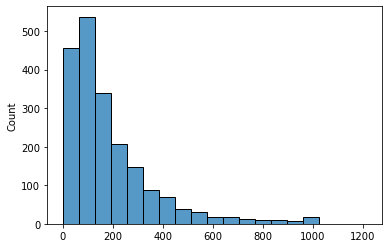

"watch people die from taking away their healthcare"

ding ding ding!  winner of stupid post of the day award!


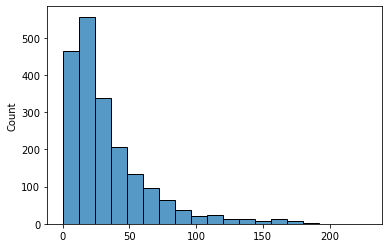

['"watch', 'people', 'die', 'from', 'taking', 'away', 'their', 'healthcare"', 'ding', 'ding', 'ding!', 'winner', 'of', 'stupid', 'post', 'of', 'the', 'day', 'award!']


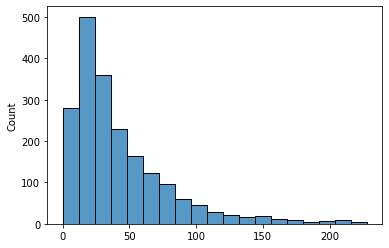

['"', 'watch', 'people', 'die', 'from', 'taking', 'away', 'their', 'healthcare', '"', 'ding', 'ding', 'ding', '!', 'winner', 'of', 'stupid', 'post', 'of', 'the', 'day', 'award', '!']


In [23]:
sent_list_test, sent_label_test, tokens_list_test = read_data(workDir + testfile)
result_test = verification(sent_list_test, prob_tran, prob_emis_pos, prob_emis_neg, total_tag)

In [36]:
precision, recall, F1 = all_f1_score(result_test, sent_label_test)
precision, recall, F1

8361 14456 14589


(0.5783757609297178, 0.5731030228254164, 0.5757273196763643)

In [37]:
F1 = avg_f1_score(result_test, sent_label_test)
np.mean(F1)

0.5304954689230249

In [26]:
def baseline(test_str, prob_emis_pos, prob_emis_neg):
    tokens_de = bert_token_labeling(test_str)[0][0]
    tokens_en = bert_token_labeling(test_str)[1][0]
    
    concat_tokens_id = []
    concat_tokens_value = []
    result_index = []

    for i in range(len(tokens_en)):
        concat_tokens_id += [tokens_en[i]]
        concat_tokens_value += [tokens_de[i]]
            
        
    dp = np.zeros((2,len(concat_tokens_id)))
    trace = np.zeros((2,len(concat_tokens_id)))

    for num, i in enumerate(concat_tokens_id):
        if i in prob_emis_pos and i in prob_emis_neg:
            result_index.append(np.argmax([prob_emis_pos[i], prob_emis_neg[i]]))
        else:
            result_index.append(0)
        
    result_dict = {
        "tokens": concat_tokens_value,
        "result_index": result_index
    }
    result_df = pd.DataFrame(result_dict)
    for i in range(result_df.shape[0]):
        if result_df.iloc[i, 0][0][0] == '#' and len(result_df.iloc[i, 0][0]) > 1:
            if result_df.iloc[i, 0][0][1] == '#':
                result_df.iloc[i, 1] = result_df.iloc[i-1, 1]

    return result_df

In [27]:
def baseline_verification(test, prob_tran, prob_emis_pos, prob_emis_neg, total_tag):
    total_result = []
    for i in test:
        result = []
        result_df = baseline([i], prob_emis_pos, prob_emis_neg)
        toxic_list = result_df[result_df['result_index']==1]["tokens"]
        for tup in toxic_list:
            for toxic in range(tup[1][0], tup[1][1]):
                result.append(toxic)
        total_result.append(result)
    return total_result

In [28]:
result_baseline = baseline_verification(sent_list, prob_tran, prob_emis_pos, prob_emis_neg, total_tag)

In [ ]:
result_baseline 

In [29]:
precision, recall, F1 = all_f1_score(result_baseline, sent_label)
precision, recall, F1

44581 64139 139115


(0.6950685230514976, 0.32046148869640223, 0.4386727936473575)

In [30]:
F1_avg = avg_f1_score(result_baseline, sent_label)
np.mean(F1_avg)

0.5615387697163204

2000


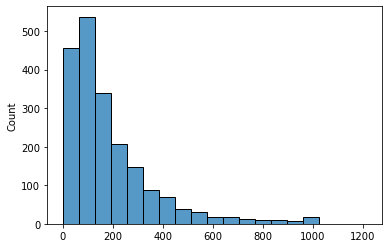

"watch people die from taking away their healthcare"

ding ding ding!  winner of stupid post of the day award!


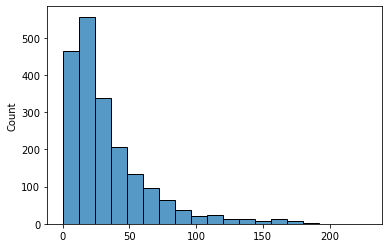

['"watch', 'people', 'die', 'from', 'taking', 'away', 'their', 'healthcare"', 'ding', 'ding', 'ding!', 'winner', 'of', 'stupid', 'post', 'of', 'the', 'day', 'award!']


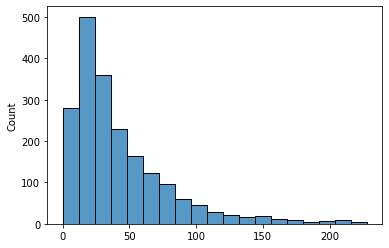

['"', 'watch', 'people', 'die', 'from', 'taking', 'away', 'their', 'healthcare', '"', 'ding', 'ding', 'ding', '!', 'winner', 'of', 'stupid', 'post', 'of', 'the', 'day', 'award', '!']


In [31]:
sent_list_test, sent_label_test, tokens_list_test = read_data(workDir + testfile)
result_baseline_test = baseline_verification(sent_list_test, prob_tran, prob_emis_pos, prob_emis_neg, total_tag)

In [32]:
F1 = avg_f1_score(result_baseline_test, sent_label_test)
print('Average F1:', np.mean(F1))

Average F1: 0.5689063784664361


In [33]:
precision, recall, F1 = all_f1_score(result_baseline_test, sent_label_test)
precision, recall, F1

9264 17303 14589


(0.5353984858117089, 0.6349989718280896, 0.5809607425059575)